In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import ttest_ind, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

In [79]:
df = pd.read_csv('Bank-Records.csv')

In [80]:
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [81]:
df.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [82]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [84]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [85]:
df.duplicated().sum()

0

In [86]:
df['CreditScore'].nunique()

460

In [87]:
print(f"Minimum CreditScore : {df['CreditScore'].min()}")
print(f"Maximum CreditScore : {df['CreditScore'].max()}")

Minimum CreditScore : 350
Maximum CreditScore : 850


In [88]:
df['CreditScore'].value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [89]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [90]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [91]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [92]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [93]:
print(f"Minimum Age : {df['Age'].min()}")
print(f"Maximum Age : {df['Age'].max()}")

Minimum Age : 18
Maximum Age : 92


In [94]:
df['Age'].value_counts()

Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64

In [95]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [96]:
df['Tenure'].nunique()

11

In [97]:
df['Tenure'].value_counts()

Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64

In [98]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [99]:
df['NumOfProducts'].nunique()

4

In [100]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [101]:
df['HasCrCard'].unique()

array([1, 0])

In [102]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

In [103]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [104]:
df['Card Type'].value_counts()

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

Number of outliers in CreditScore coulmn are : 8 
Number of outliers in Age coulmn are : 133 
Number of outliers in Tenure coulmn are : 0 
Number of outliers in NumOfProducts coulmn are : 60 


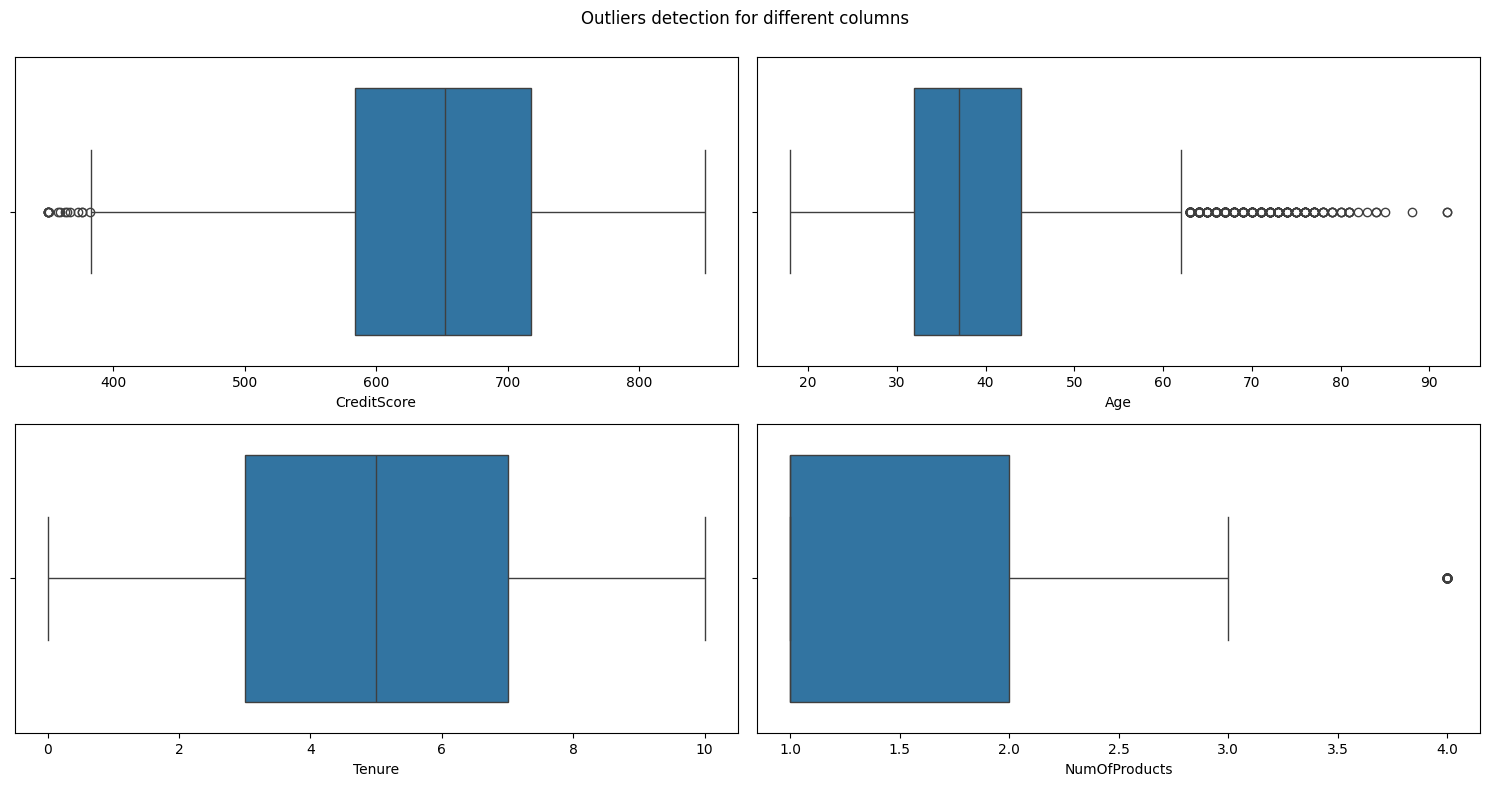

In [105]:
cols= ['CreditScore','Age','Tenure','NumOfProducts']
c=1
plt.figure(figsize = (15, 16))
for col in cols:
  z_scores = scipy.stats.zscore(df[col])
  outliers = np.where((z_scores < -3) | (z_scores > 3))[0]
  plt.subplot(4,2,c)
  sns.boxplot(x= df[col])
  c+=1
  print(f'Number of outliers in {col} coulmn are : {len(outliers)} ')

plt.suptitle('Outliers detection for different columns',y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


- There are no Outliers present in Tenure.
- However there significant number of outliers present in Age column
- There are less number of outliers present in CreditScore and numberofproducts.

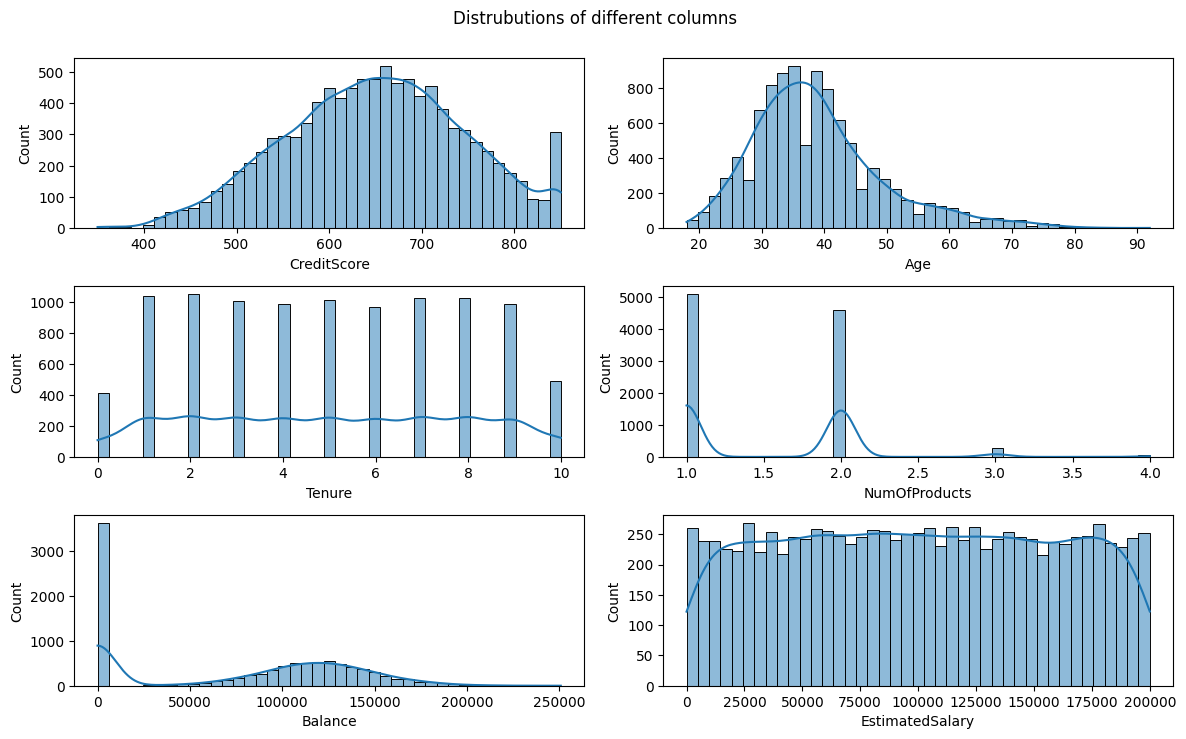

In [106]:
plt.figure(figsize=(12,10))
cols= ['CreditScore','Age','Tenure','NumOfProducts','Balance','EstimatedSalary']
c=1
for i in cols:

  plt.subplot(4,2,c)
  sns.histplot(x=df[i],kde=True,bins=41)
  c+=1

plt.suptitle('Distrubutions of different columns',y=0.95)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [107]:
# removing the column RowNumber
df.drop(columns=['RowNumber'],inplace=True)

In [108]:
"""
will categorise the credit score based on following
  - Poor Credit: 350-579
  - Fair Credit: 580-669
  - Good Credit: 670-739
  - Very Good Credit: 740-799
  - Excellent Credit: 800-850

"""
def cat(x):
  if x>=350 and x<=579:
    return 'Poor Credit'
  elif x>=580 and x<670:
    return 'Fair Credit'
  elif x>=670 and x<740:
    return 'Very Good Credit'
  else:
    return 'Excellent Credit'


df['credit_category']= df['CreditScore'].apply(cat)

- The above function categories the customers based on their creditscores.
- It helps in understanding customers' creditworthiness allows businesses to tailor their offerings accordingly. For example customers with Excellent Credit Scores may qualify for better interset rates and they can recive higher credit limit.
- It enables the bussinesses to create targeted marketing campaigns.So that they can send messages and promotions based on it.

In [109]:
# percentage distrubution of credit_category
cat_count = df['credit_category'].value_counts()
total = cat_count.sum()
percent_dist= (cat_count/total)*100
percent_dist

credit_category
Fair Credit         33.31
Very Good Credit    24.28
Poor Credit         23.62
Excellent Credit    18.79
Name: count, dtype: float64

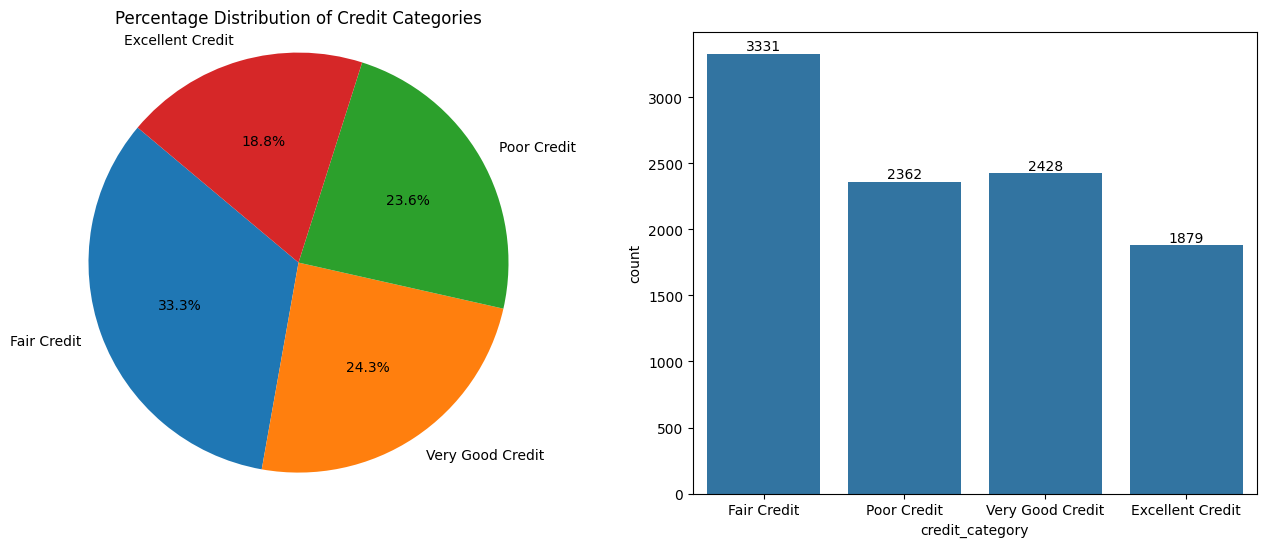

In [110]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.pie(percent_dist, labels=percent_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Credit Categories')
plt.axis('equal')

plt.subplot(1,2,2)
label= sns.countplot(x=df['credit_category'])
for i in label.containers:
  label.bar_label(i)
plt.show()

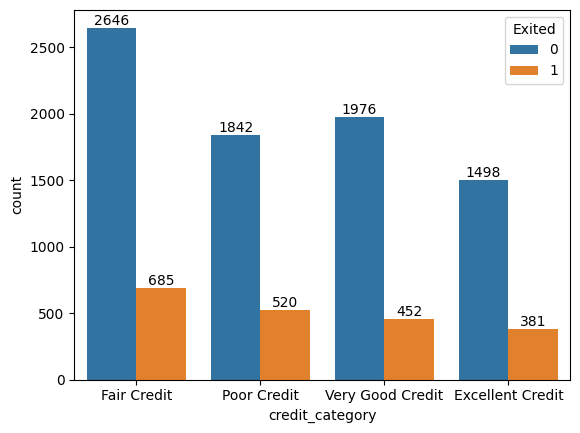

In [111]:
# compare the credit category with churn

label= sns.countplot(x=df['credit_category'],hue=df['Exited'])
for i in label.containers:
  label.bar_label(i)

In [112]:
# Caluacate churn rate based on credit category

df1= pd.DataFrame(np.round(df.groupby('credit_category')['Exited'].mean()*100,2)).reset_index()
df1.rename(columns={'Exited':'Churn Rate'},inplace=True)
df1

credit_category  Churn Rate
0  Excellent Credit       20.28
1       Fair Credit       20.56
2       Poor Credit       22.02
3  Very Good Credit       18.62

- There is high churn rate for the poor credit scored customers compared to other categories.
- The cataegory named Very Good Credit has least churn rate.

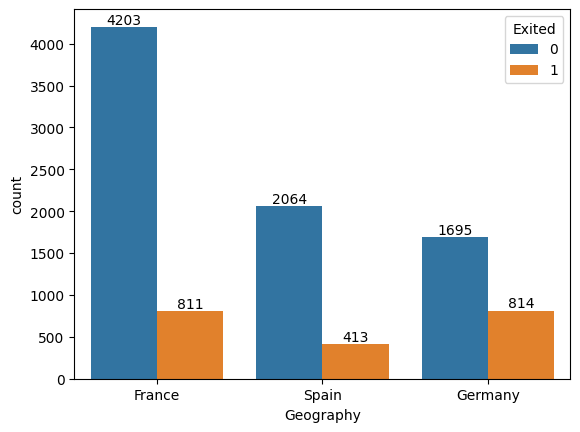

In [113]:
label=sns.countplot(x=df['Geography'],hue=df['Exited'])
for i in label.containers:
  label.bar_label(i)

In [114]:
# Caluacate churn rate based on Geography

df2= pd.DataFrame(np.round(df.groupby('Geography')['Exited'].mean()*100,2)).reset_index()
df2.rename(columns={'Exited':'Churn Rate'},inplace=True)
df2

Geography  Churn Rate
0    France       16.17
1   Germany       32.44
2     Spain       16.67

- From above churn rates we can observe that Germany having higher churn rate compared to others.while France and spain have same rate of churn .


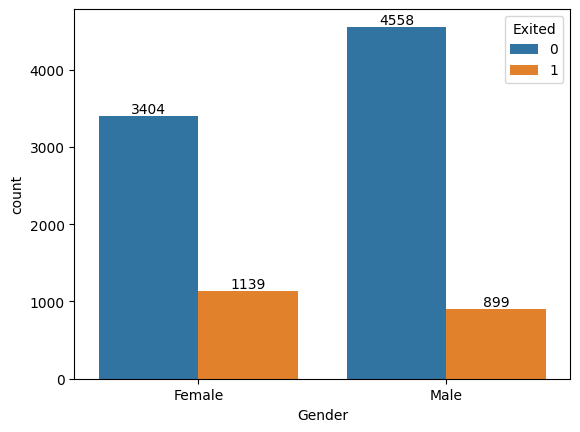

In [115]:
label=sns.countplot(x=df['Gender'],hue=df['Exited'])
for i in label.containers:
  label.bar_label(i)

In [116]:
# Caluacate churn rate based on Gender

df3= pd.DataFrame(np.round(df.groupby('Gender')['Exited'].mean()*100,2)).reset_index()
df3.rename(columns={'Exited':'Churn Rate'},inplace=True)
df3

Gender  Churn Rate
0  Female       25.07
1    Male       16.47

- From above Churn Rates we can say that females are more likely to leave the banks compared to males.

In [117]:
def cat_age(x):
  if x>=18 and x<=35:
    return 'Young Adults'
  elif x>=36 and x<=55:
    return 'Middle-Aged Adults'
  else:
    return 'Senior Adults'

df['Age_Category']= df['Age'].apply(cat_age)

- From above categorised the customers based on th their Age's this will benfit us :
- Understanding the customer demographics helps us for targeted marketing.
- helps in developing products and services that cater to the needs of different age groups. For example, younger customers might be interested in mobile banking apps and digital payment solutions, while older customers might prefer traditional banking services and personalized assistance.

In [118]:
age_cat= df['Age_Category'].value_counts()
total = age_cat.sum()
percent_dist = (age_cat/total)*100
percent_dist

Age_Category
Middle-Aged Adults    50.47
Young Adults          41.53
Senior Adults          8.00
Name: count, dtype: float64

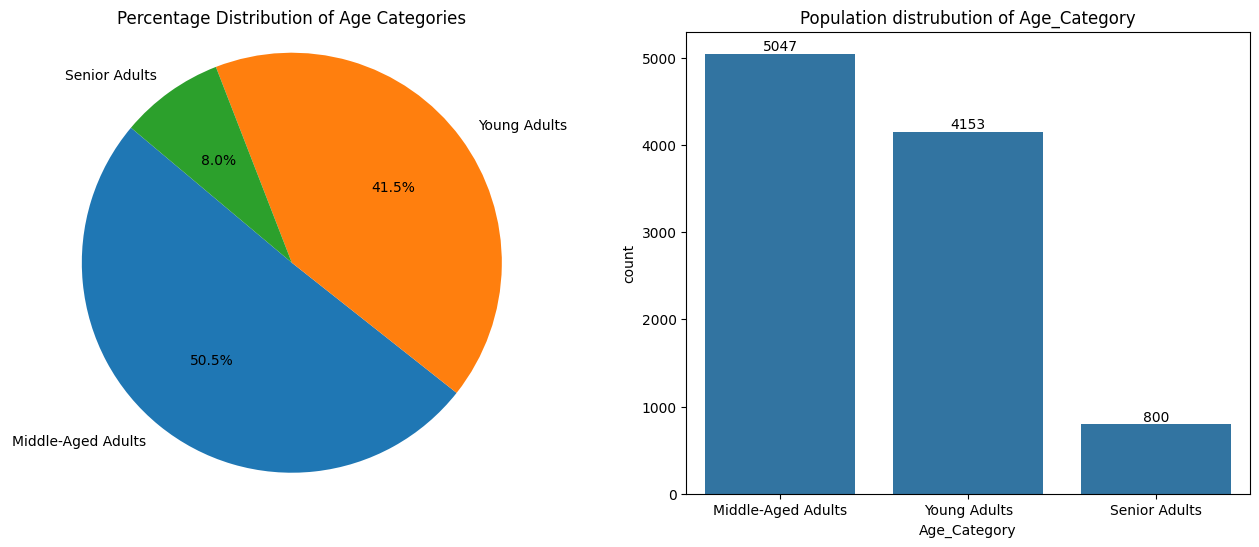

In [119]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.pie(percent_dist, labels=percent_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Age Categories')
plt.axis('equal')

plt.subplot(1,2,2)
label= sns.countplot(x=df['Age_Category'])
for i in label.containers:
  label.bar_label(i)
plt.title('Population distrubution of Age_Category')
plt.show()

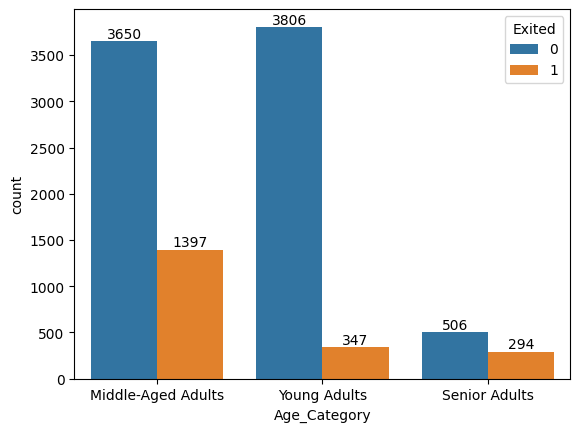

In [120]:
label=sns.countplot(x=df['Age_Category'],hue=df['Exited'])
for i in label.containers:
  label.bar_label(i)

In [121]:
# Caluacate churn rate based on Age_Category

df4= pd.DataFrame(np.round(df.groupby('Age_Category')['Exited'].mean()*100,2)).reset_index()
df4.rename(columns={'Exited':'Churn Rate'},inplace=True)
df4

Age_Category  Churn Rate
0  Middle-Aged Adults       27.68
1       Senior Adults       36.75
2        Young Adults        8.36

- From the churn rate we can observe that Senior Adults are more likely to leave the bank compared to Middle-aged and young customers.

In [122]:
def cat_tenure(x):
    if x < 1:
        return 'New Customers'
    elif 1 <= x <= 5:
        return 'Regular Customers'
    else:
        return 'Long-Term Customers'

df['Tenure_Category'] = df['Tenure'].apply(cat_tenure)


- Above function categorises the customers based on years of relatonship with the banks.This done because
- Banks can now design loyalty programs based on the tenure segments.
-Offering exclusive benefits, rewards, or discounts to long-standing customers can incentivize loyalty and encourage them to continue using the bank's products and services.

In [123]:
df['Tenure_Category'].value_counts()

Tenure_Category
Regular Customers      5093
Long-Term Customers    4494
New Customers           413
Name: count, dtype: int64

In [124]:
tenure_cat= df['Tenure_Category'].value_counts()
total = tenure_cat.sum()
percent_dist = (tenure_cat/total)*100
percent_dist

Tenure_Category
Regular Customers      50.93
Long-Term Customers    44.94
New Customers           4.13
Name: count, dtype: float64

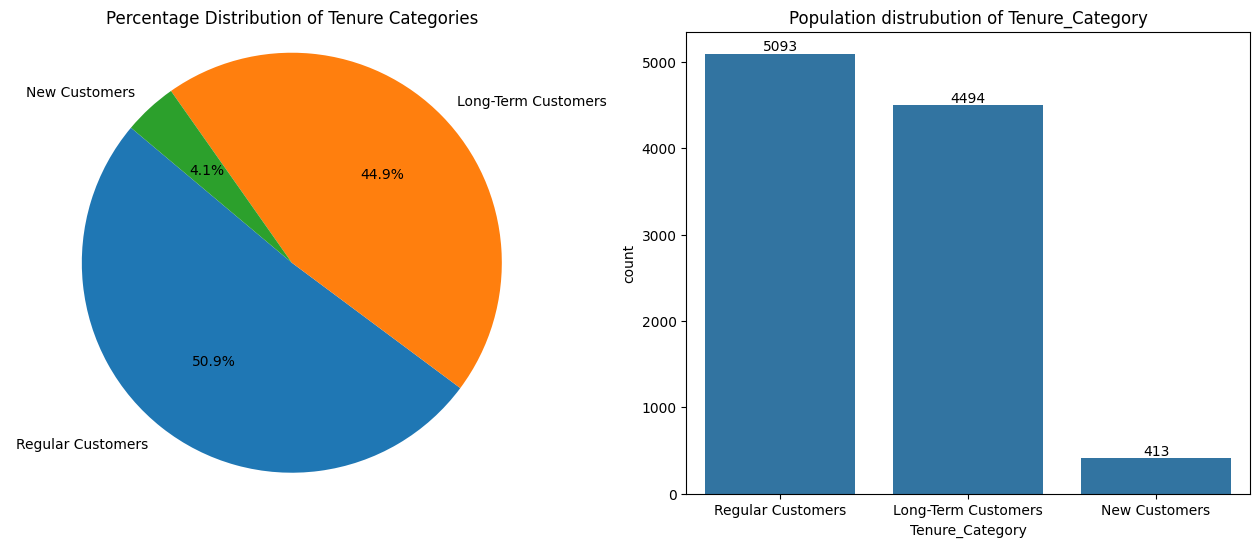

In [125]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.pie(percent_dist, labels=percent_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Tenure Categories')
plt.axis('equal')

plt.subplot(1,2,2)
label= sns.countplot(x=df['Tenure_Category'])
for i in label.containers:
  label.bar_label(i)
plt.title('Population distrubution of Tenure_Category')
plt.show()
plt.show()

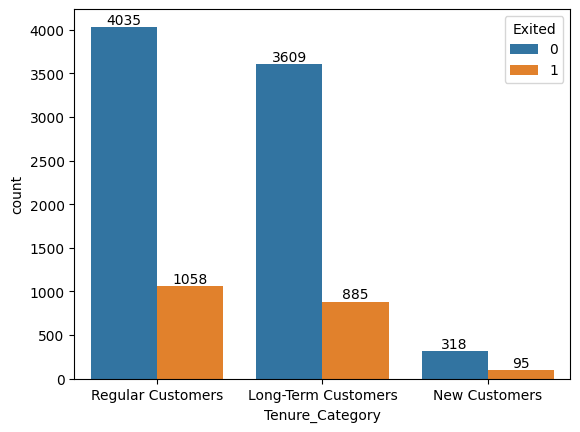

In [126]:
label=sns.countplot(x=df['Tenure_Category'],hue=df['Exited'])
for i in label.containers:
  label.bar_label(i)

In [127]:
# Caluacate churn rate based on Tenure_Category

df4= pd.DataFrame(np.round(df.groupby('Tenure_Category')['Exited'].mean()*100,2)).reset_index()
df4.rename(columns={'Exited':'Churn Rate'},inplace=True)
df4

Tenure_Category  Churn Rate
0  Long-Term Customers       19.69
1        New Customers       23.00
2    Regular Customers       20.77

- From the Churn Rates we can understand that New customers are much likely to leave the bank compared to the other type of customers.

In [128]:
df['Satisfaction Score'].value_counts()

Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

In [129]:
def cat_satisfaction(x):
    if x == 1:
        return 'Frustrated'
    elif x== 2:
        return 'Dissatisfied'
    elif x==3:
      return 'Neutral'
    elif x==4:
      return 'Satisfied'
    else:
      return 'Exceptional'

df['Satisfaction_Category'] = df['Satisfaction Score'].apply(cat_satisfaction)


In [130]:
df['Satisfaction_Category'].value_counts()

Satisfaction_Category
Neutral         2042
Dissatisfied    2014
Satisfied       2008
Exceptional     2004
Frustrated      1932
Name: count, dtype: int64

In [131]:
satis_cat= df['Satisfaction_Category'].value_counts()
total = satis_cat.sum()
percent_dist = (satis_cat/total)*100
percent_dist

Satisfaction_Category
Neutral         20.42
Dissatisfied    20.14
Satisfied       20.08
Exceptional     20.04
Frustrated      19.32
Name: count, dtype: float64

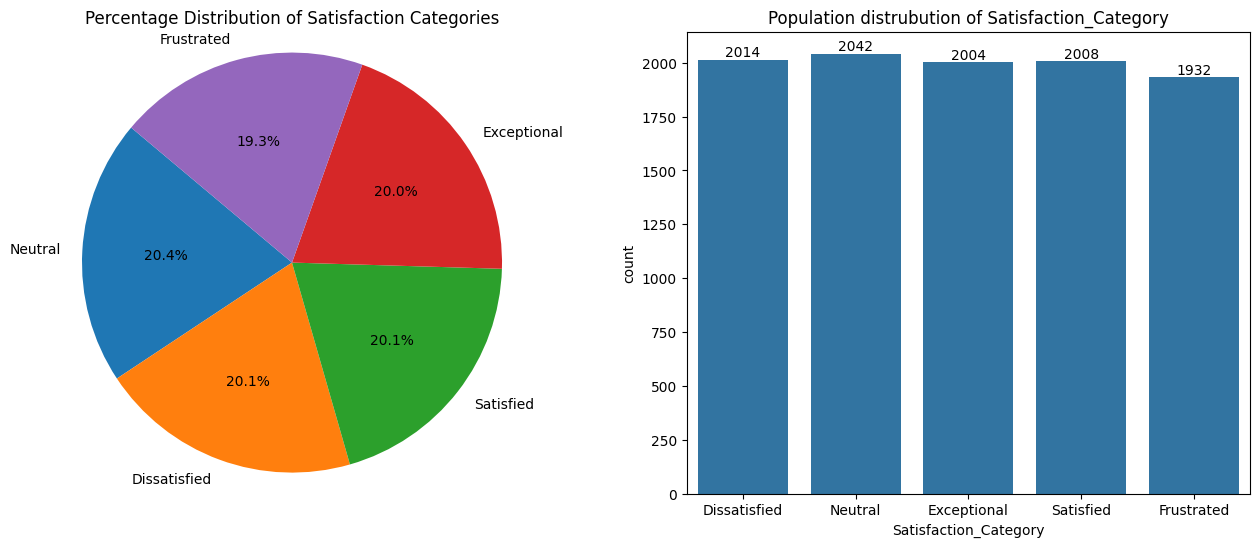

In [132]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.pie(percent_dist, labels=percent_dist.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Satisfaction Categories')
plt.axis('equal')

plt.subplot(1,2,2)
label= sns.countplot(x=df['Satisfaction_Category'])
for i in label.containers:
  label.bar_label(i)
plt.title('Population distrubution of Satisfaction_Category')
plt.show()
plt.show()

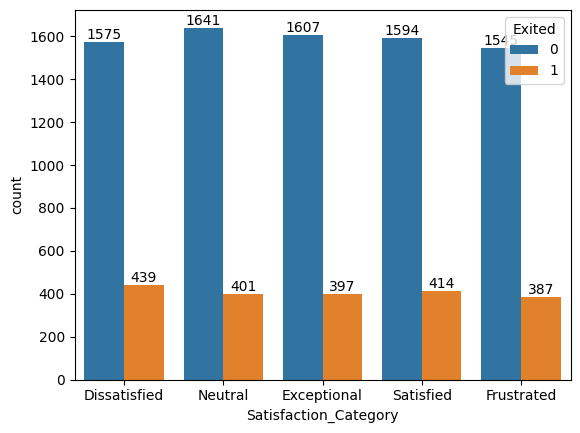

In [133]:
label=sns.countplot(x=df['Satisfaction_Category'],hue=df['Exited'])
for i in label.containers:
  label.bar_label(i)

In [134]:
# Caluacate churn rate based on Satisfaction_Category

df5= pd.DataFrame(np.round(df.groupby('Satisfaction_Category')['Exited'].mean()*100,2)).reset_index()
df5.rename(columns={'Exited':'Churn Rate'},inplace=True)
df5

Satisfaction_Category  Churn Rate
0          Dissatisfied       21.80
1           Exceptional       19.81
2            Frustrated       20.03
3               Neutral       19.64
4             Satisfied       20.62

- From above Churn Rates we can observe that fro Dissatisfied customers have much likely leave the bank when compared to exceptional and neutral satisfaction scores.

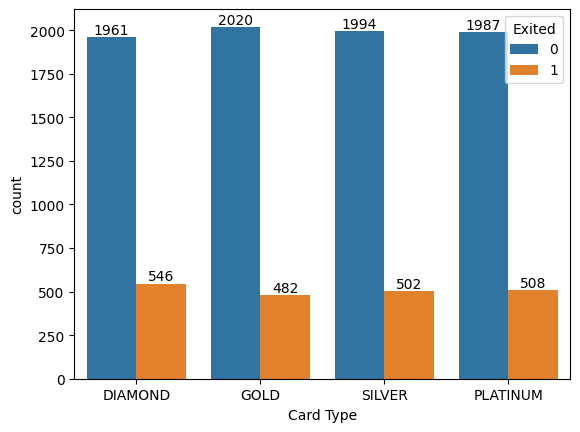

In [135]:
label=sns.countplot(x=df['Card Type'],hue=df['Exited'])
for i in label.containers:
  label.bar_label(i)

In [136]:
# Caluacate churn rate based on Satisfaction_Category

df6= pd.DataFrame(np.round(df.groupby('Card Type')['Exited'].mean()*100,2)).reset_index()
df6.rename(columns={'Exited':'Churn Rate'},inplace=True)
df6

Card Type  Churn Rate
0   DIAMOND       21.78
1      GOLD       19.26
2  PLATINUM       20.36
3    SILVER       20.11

- From above churn Rates we can say that rate is almost same fro all the cardTypes.

In [137]:
df['NumOfProducts'].value_counts()

NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [138]:
df8= pd.DataFrame(np.round(df.groupby('NumOfProducts')['Exited'].mean()*100,2)).reset_index()
df8.rename(columns={'Exited':'Churn Rate'},inplace=True)
df8

NumOfProducts  Churn Rate
0              1       27.71
1              2        7.60
2              3       82.71
3              4      100.00

- The churn rates vary significantly based on the number of products held by customers. Customers with fewer products tend to have lower churn rates, while those with a higher number of products exhibit much higher churn rates.
- However, the churn rate increases drastically for customers with 3 products, reaching 82.71%, and further escalates to 100% for customers with 4 products.


In [139]:
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

In [140]:
df8= pd.DataFrame(np.round(df.groupby('IsActiveMember')['Exited'].mean()*100,2)).reset_index()
df8.rename(columns={'Exited':'Churn Rate'},inplace=True)
df8

IsActiveMember  Churn Rate
0               0       26.87
1               1       14.27

-There is a noticeable disparity in churn rates between active and inactive members. Customers who are active members exhibit a significantly lower churn rate of 14.27%, whereas inactive members have a higher churn rate of 26.87%.

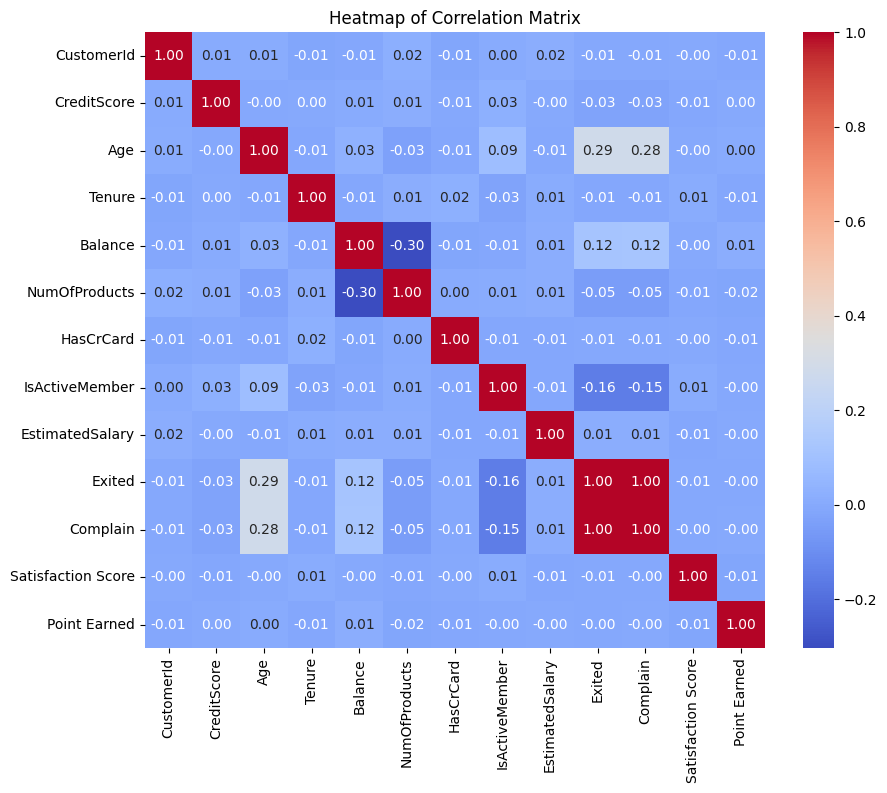

In [141]:

numerical_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

- From this , we can understand that Compalin and Exited are highly correlated.

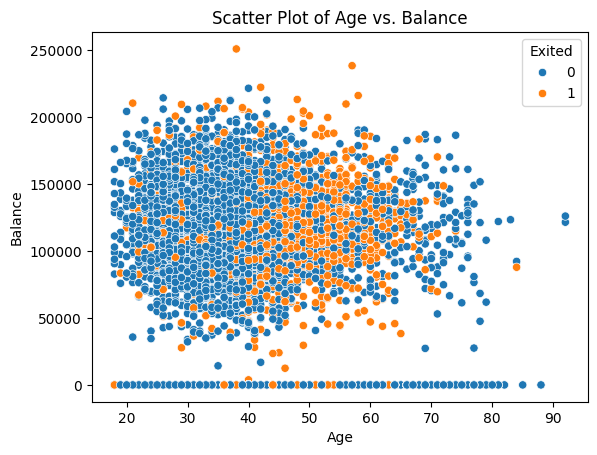

In [142]:
# Scatter Plot: Age vs. Balance, differentiated by churn status
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited')
plt.title('Scatter Plot of Age vs. Balance')
plt.show()

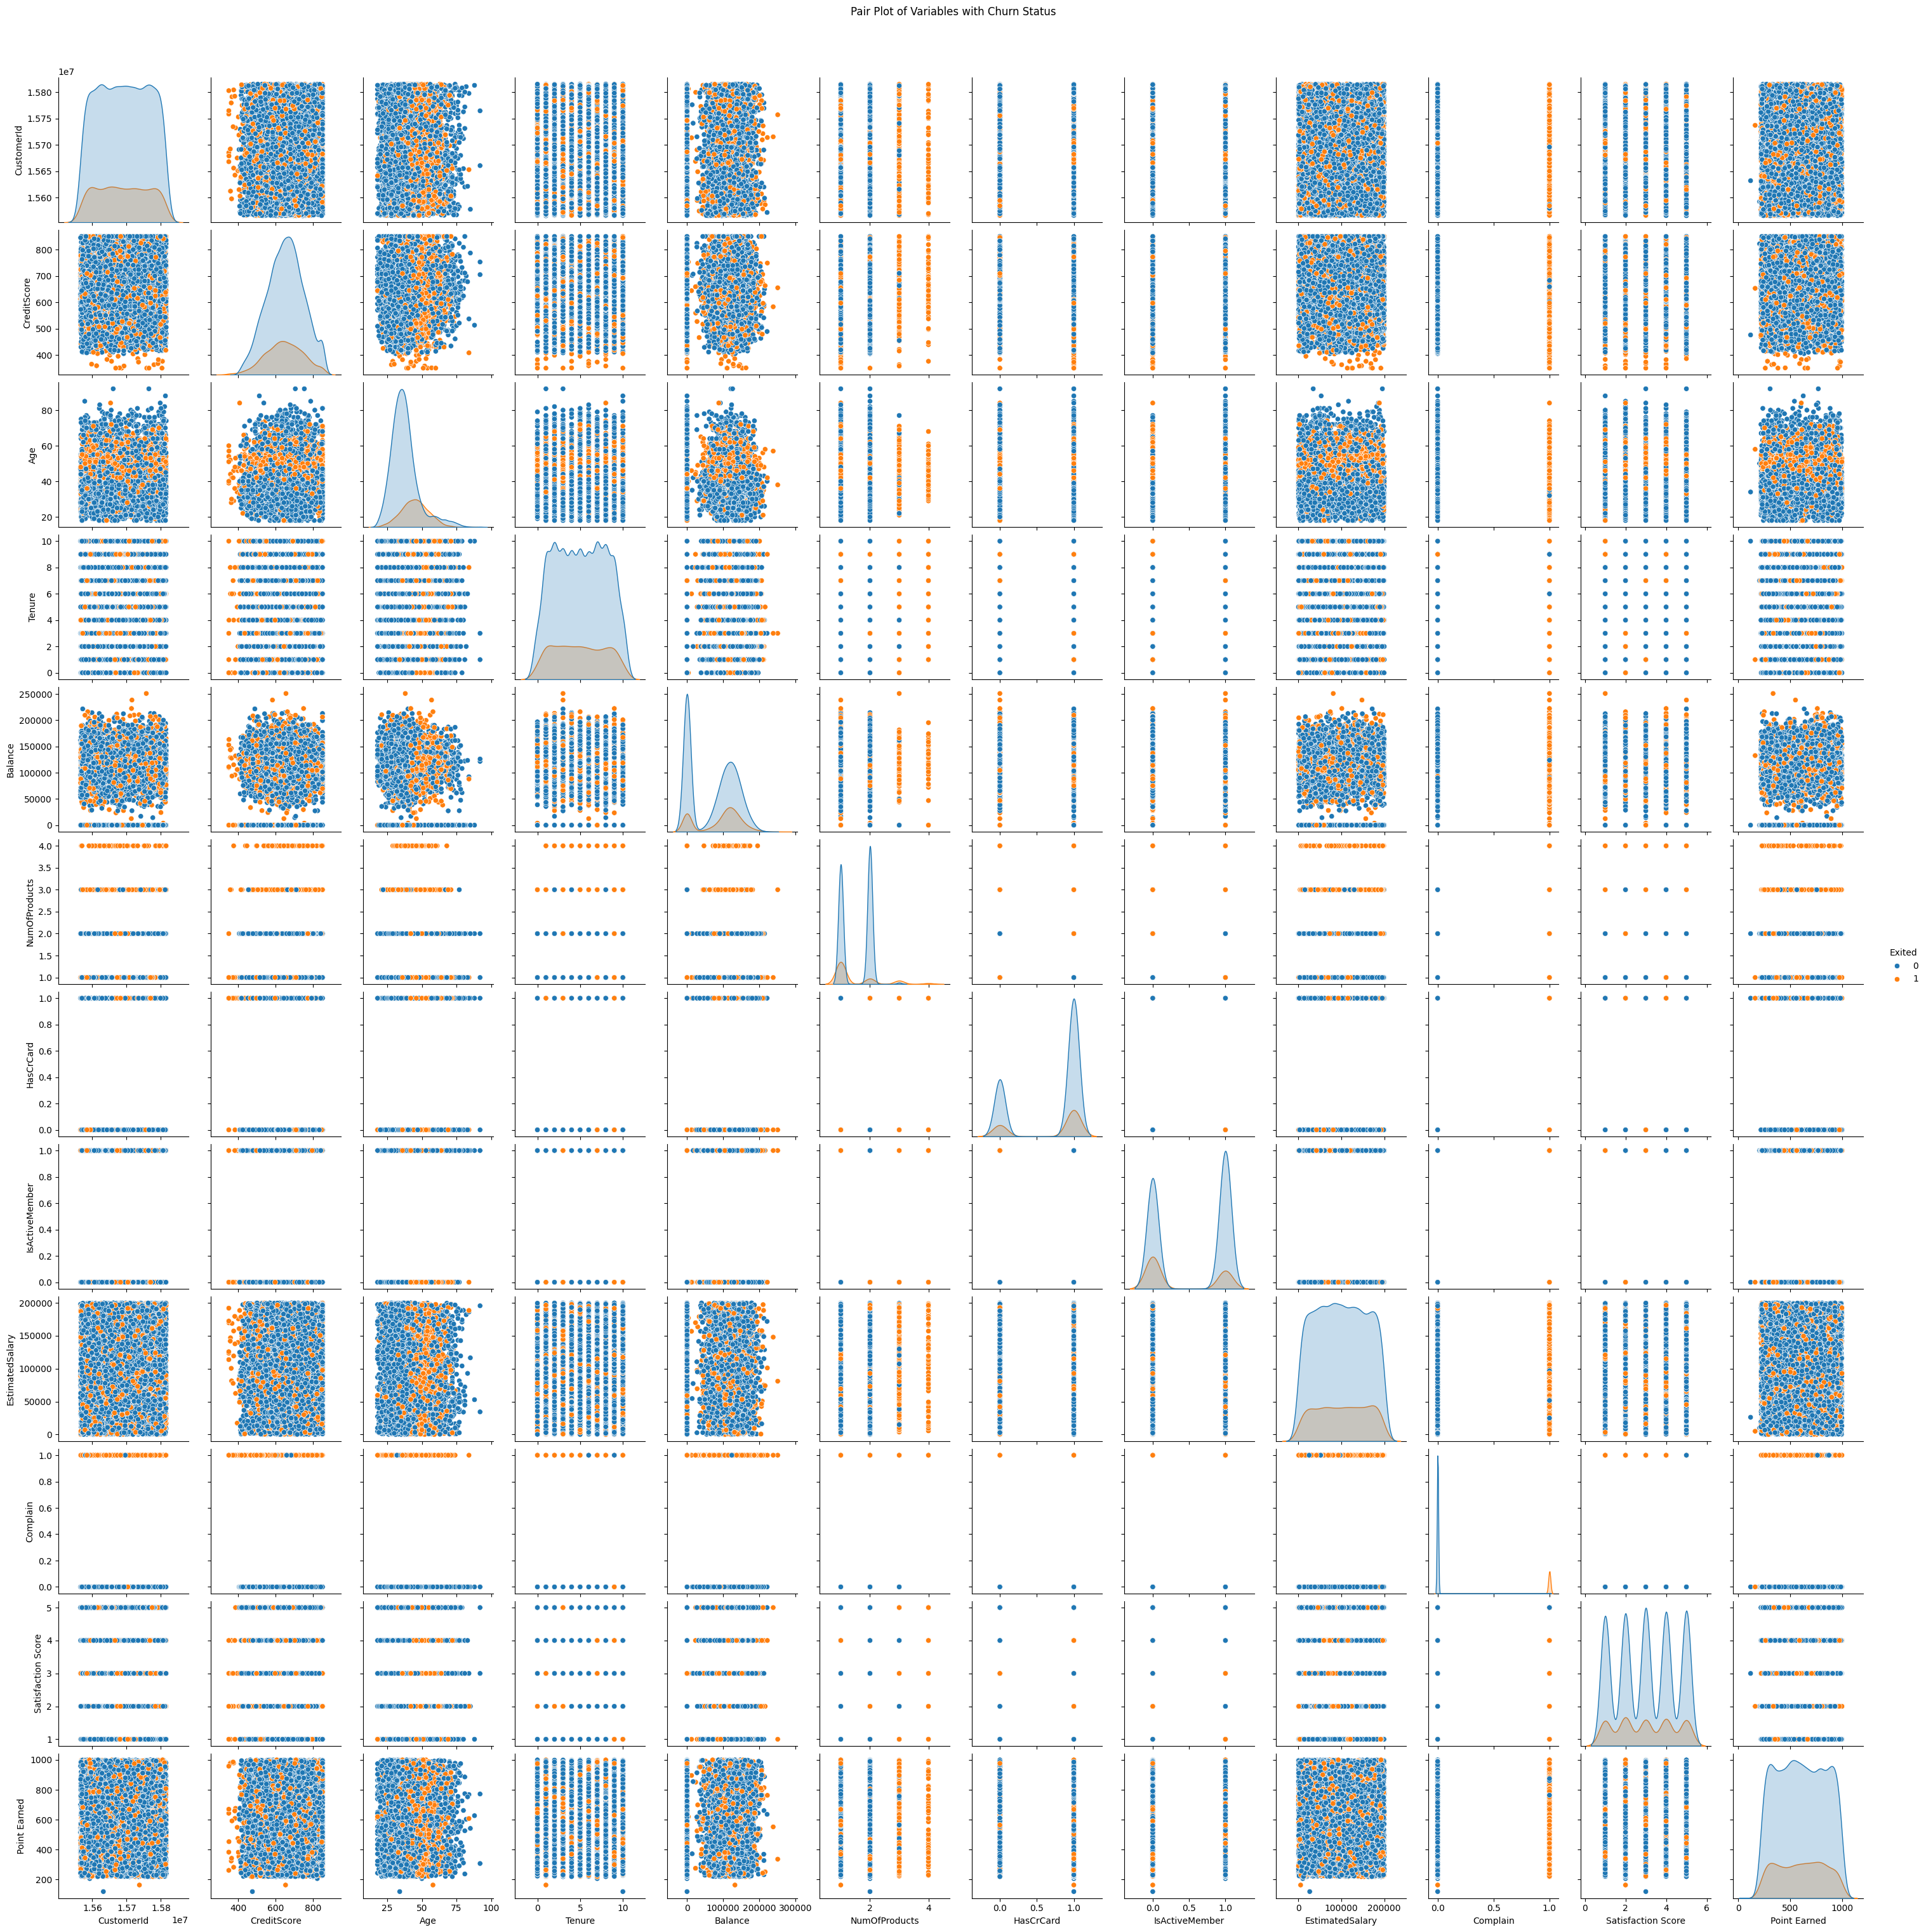

In [143]:
sns.pairplot(df, hue='Exited', diag_kind='kde')
plt.suptitle('Pair Plot of Variables with Churn Status', y=1.02)
plt.show()

### Is there asignificant association between credit_category and Exited(churn)

- **Null Hypothesis** (H0): There is no significant association between "credit_category" and "Exited" (i.e., the two variables are independent).
- **Alternate Hypothesis** (H1): There is a significant association between "credit_category" and "Exited" (i.e., the two variables are dependent).

-Assumed **significance value(alpha)** : 5% i.e.  0.05

- Based on p-value, we will accept or reject H0.
  - if **p-value < alpha** : Reject Null(H0)
  - if **p-value > alpha** : Fail to Reject Null(H0)

In [144]:
alpha =0.05

contingency_table = pd.crosstab(df['credit_category'], df['Exited'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

if p_value < alpha:
    print("\nSince the p-value is less than", alpha, ", we reject the null hypothesis.")
    print("There is a significant association between 'credit_category' and 'Exited'.")
else:
    print("\nSince the p-value is greater than or equal to", alpha, ", we fail to reject the null hypothesis.")
    print("There is no significant association between 'credit_category' and 'Exited'.")

Chi-squared statistic: 8.629847669253339
p-value: 0.03463941772356086
Degrees of freedom: 3

Since the p-value is less than 0.05 , we reject the null hypothesis.
There is a significant association between 'credit_category' and 'Exited'.


### Is there a significant association between customers' geographical locations and their Exited status(churn)

- **Null Hypothesis** (H0): There is no significant association between customers' geographical locations and their churn status..
- **Alternate Hypothesis** (H1): There is a significant association between customers' geographical locations and their churn status.

-Assumed **significance value(alpha)** : 5% i.e.  0.05

- Based on p-value, we will accept or reject H0.
  - if **p-value < alpha** : Reject Null(H0)
  - if **p-value > alpha** : Fail to Reject Null(H0)

In [145]:
contingency_table = pd.crosstab(df['Geography'], df['Exited'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

if p_value < alpha:
    print("\nSince the p-value is less than", alpha, ", we reject the null hypothesis.")
    print("There is a significant association between 'Geography' and 'Exited'.")
else:
    print("\nSince the p-value is greater than or equal to", alpha, ", we fail to reject the null hypothesis.")
    print("There is no significant association between 'Geography' and 'Exited'.")

Chi-squared statistic: 300.6264011211942
p-value: 5.245736109572763e-66
Degrees of freedom: 2

Since the p-value is less than 0.05 , we reject the null hypothesis.
There is a significant association between 'Geography' and 'Exited'.


### Is there a significant association between customers' Gender and their Exited status(churn)

- **Null Hypothesis** (H0): The proportions of churned and non-churned customers are independent of their gender.

- **Alternate Hypothesis** (H1): The proportions of churned and non-churned customers are dependent on their gender.

-Assumed **significance value(alpha)** : 5% i.e.  0.05

- Based on p-value, we will accept or reject H0.
  - if **p-value < alpha** : Reject Null(H0)
  - if **p-value > alpha** : Fail to Reject Null(H0)

In [146]:
contingency_table = pd.crosstab(df['Gender'], df['Exited'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05

print("Chi-squared statistic:", chi2)
print("p-value:", p_value)

if p_value < alpha:
    print("\nSince the p-value is less than", alpha, ", we reject the null hypothesis.")
    print("There is a significant association between 'Gender' and 'Exited'.")
else:
    print("\nSince the p-value is greater than or equal to", alpha, ", we fail to reject the null hypothesis.")
    print("There is no significant association between 'Gender' and 'Exited'.")

Chi-squared statistic: 112.39655374778587
p-value: 2.9253677618642e-26

Since the p-value is less than 0.05 , we reject the null hypothesis.
There is a significant association between 'Gender' and 'Exited'.


### Is there a significant association between customers' Age group and their Exited status(churn)

- **Null Hypothesis** (H0): There is no significant association between customers' age categories and their churn status.

- **Alternate Hypothesis** (H1): There is a significant association between customers' age categories and their churn status.

-Assumed **significance value(alpha)** : 5% i.e.  0.05

- Based on p-value, we will accept or reject H0.
  - if **p-value < alpha** : Reject Null(H0)
  - if **p-value > alpha** : Fail to Reject Null(H0)

In [147]:
contingency_table = pd.crosstab(df['Age_Category'], df['Exited'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05
print("Chi-squared statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

if p_value < alpha:
    print("\nSince the p-value is less than", alpha, ", we reject the null hypothesis.")
    print("There is a significant association between 'Age_Category' and 'Exited'.")
else:
    print("\nSince the p-value is greater than or equal to", alpha, ", we fail to reject the null hypothesis.")
    print("There is no significant association between 'Age_Category' and 'Exited'.")

Chi-squared statistic: 667.9223898412331
p-value: 9.172672254442309e-146
Degrees of freedom: 2

Since the p-value is less than 0.05 , we reject the null hypothesis.
There is a significant association between 'Age_Category' and 'Exited'.


In [148]:
df.head()

CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  ...  EstimatedSalary  Exited  \
0       0.00              1          1  ...        101348.88       1   
1   83807.86              1          0  ...        112542.58       0   
2  159660.80              3          1  ...        113931.57       1   
3       0.00              2          0  ...         93826.63       0   
4  125510.82              1          1  ...         79084.10       0   

   Complain  Satisfaction Score  Card Type Point Earned   credit_category  \
0         1                   2    DIAMOND          464       Fair Credit   
1         1                   3    DIAMOND          456       Fair Credit   
2         1                   3    DIAMOND          377       Poor Credit   
3         0                   5       GOLD          350  Very Good Credit   
4         0                   5       GOLD          425  Excellent Credit   

         Age_Category      Tenure_Category Satisfaction_Category  
0  Middle-Aged Adults    Regular Customers          Dissatisfied  
1  Middle-Aged Adults    Regular Customers               Neutral  
2  Middle-Aged Adults  Long-Term Customers               Neutral  
3  Middle-Aged Adults    Regular Customers           Exceptional  
4  Middle-Aged Adults    Regular Customers           Exceptional  

[5 rows x 21 columns]

### Is there a significant difference in the mean balance between churned and non-churned.

- **Null Hypothesis** (H0): There is no significant difference in the mean balance between churned and non-churned customers.

- **Alternate Hypothesis** (H1): There is a significant difference in the mean balance between churned and non-churned customers.

-Assumed **significance value(alpha)** : 5% i.e.  0.05

- Based on p-value, we will accept or reject H0.
  - if **p-value < alpha** : Reject Null(H0)
  - if **p-value > alpha** : Fail to Reject Null(H0)

In [149]:
churned_balance = df[df['Exited'] == 1]['Balance']
non_churned_balance = df[df['Exited'] == 0]['Balance']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(churned_balance, non_churned_balance)

# Significance level (α)
alpha = 0.05

# Print the results
print("Two-sample t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("\nSince the p-value is less than", alpha, ", we reject the null hypothesis.")
    print("There is a significant difference in the mean balance between churned and non-churned customers.")
else:
    print("\nSince the p-value is greater than or equal to", alpha, ", we fail to reject the null hypothesis.")
    print("There is no significant difference in the mean balance between churned and non-churned customers.")

Two-sample t-test results:
t-statistic: 11.940747722508185
p-value: 1.2092076077156017e-32

Since the p-value is less than 0.05 , we reject the null hypothesis.
There is a significant difference in the mean balance between churned and non-churned customers.


## **Insights**

- Credit scores provide a measure of a customer's creditworthiness and likelihood of defaulting on loans or credit obligations. By categorizing customers into different credit categories, banks can assess the level of risk associated with each customer.
- Customers with varied credit scores are frequently subject to differing loan terms and restrictions from banks. By allowing banks to quickly recognize customers who satisfy the credit standards for various loan or financial product categories, customer credit score categorization helps the loan approval process.
- Interest rates on credit cards and loans are mostly determined by credit ratings. Higher credit score holders are usually eligible for lower interest rates, whereas lower credit score holders could pay higher interest rates as a way of making up for the higher default risk.
- Customers with 'Very Good Credit' have a comparatively lower churn rate at 18.62%, indicating that individuals with better credit profiles are less likely to churn.
- There is a noticeable difference in churn rates between genders. The churn rate for females is substantially higher at 25.07%, compared to males at 16.47%.
- The higher churn rate among females could be attributed to various factors such as differing financial needs, preferences, and life stages
- Different age categories may exhibit distinct financial needs, behaviors, and priorities. For example, 'Young Adults' may be more focused on building savings, managing student loans, and establishing credit, while 'Senior Adults' may be concerned with retirement planning and wealth preservation.
- Customers in each age category may have varying preferences for banking products and services. 'Young Adults' may prefer digital banking solutions and mobile payment apps, while 'Senior Adults' may prefer traditional banking services and face-to-face interactions with bank staff.
- The churn rates vary significantly across different age categories. 'Senior Adults' have the highest churn rate at 36.75%, followed by 'Middle-Aged Adults' at 27.68%.
- The churn rates vary across different tenure categories. 'New Customers' have the highest churn rate at 23.00%, followed by 'Regular Customers' at 20.77% and 'Long-Term Customers' at 19.69%.
- The churn rates vary slightly across different satisfaction categories. 'Dissatisfied' customers have the highest churn rate at 21.80%, followed by 'Satisfied' customers at 20.62%.
- There is a noticeable disparity in churn rates between active and inactive members. Customers who are active members exhibit a significantly lower churn rate of 14.27%, whereas inactive members have a higher churn rate of 26.87%.
- This suggests that customer activity, engagement, and interaction with the bank play a significant role in influencing churn behavior.


## **Recommendations**

- Develop targeted retention strategies customized for each credit category. Focus on addressing the specific needs and pain points of customers within each group to improve satisfaction and loyalty.
- For customers with lower credit scores (e.g., 'Poor Credit' and 'Fair Credit'), consider offering financial education programs, credit-building tools, and personalized assistance to help improve their financial situations and loyalty to the bank.
- Educate customers on responsible financial management practices, debt management strategies, and ways to improve their creditworthiness over time.
- Conduct regular analysis and evaluation of retention strategies to assess their effectiveness and make necessary adjustments based on the evolving needs and preferences of customers.
- Tailor marketing campaigns and product offerings to better address the needs and preferences of female customers.
- offer student banking packages and budgeting tools for 'Young Adults', retirement planning services for 'Senior Adults', and a diverse range of investment options for 'Middle-Aged Adults'.
- Identify and address the root causes of dissatisfaction among customers categorized as 'Dissatisfied'. Conduct in-depth analysis and gather feedback to understand the factors contributing to their dissatisfaction, and take corrective actions to improve their experience and reduce churn.
- Reach out to inactive members proactively to re-engage them with the bank. Provide personalized offers, targeted promotions.
- Continuously monitor customer activity and engagement levels to identify trends, patterns, and potential churn risks. Use data analytics and predictive modeling to anticipate customer behavior and intervene proactively to prevent churn.